In [38]:
# Milestone 3:  Recommendations using ClusterID

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Load final dataset (from Milestone 2)
df = pd.read_csv("final_clustering_dataset.csv")

# Ensure 'ClusterID' column exists
if "ClusterID" not in df.columns:
    raise ValueError("'ClusterID' column not found in the dataset!")

# Cluster Analysis
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Compute mean values per cluster
cluster_means = df.groupby("ClusterID", observed=False)[num_cols].mean().round(2)
display(Markdown("# Cluster Mean Summary"))
display(cluster_means)


# Define domain-specific recommendations based on observed behavior
recommendations = {
    0: {
        "Cluster Insight": "High performers – consistent and balanced results across assessments.",
        "Recommendations": [
            "Maintain current study patterns and time management.",
            "Explore advanced projects or leadership opportunities.",
            "Participate in research or innovation competitions."
        ],
        "Weekly Plan": [
            "Revise two subjects thoroughly each week.",
            "Attempt one mock test every weekend.",
            "Engage in self-paced advanced learning or certification."
        ]
    },
    1: {
        "Cluster Insight": "Average performers – steady but with potential for higher improvement.",
        "Recommendations": [
            "Focus on weak topics identified in quizzes and assignments.",
            "Follow a consistent revision schedule with small targets.",
            "Join study groups for conceptual clarity and discussion."
        ],
        "Weekly Plan": [
            "Study 2–3 hours daily with focus on one weak subject.",
            "Complete one practice paper each week.",
            "Attend 1–2 topic-specific tutorials or lectures."
        ]
    },
    2: {
        "Cluster Insight": "Low performers – need structured learning and motivational support.",
        "Recommendations": [
            "Seek mentorship or additional guidance sessions.",
            "Increase frequency of practice and self-assessment.",
            "Start with foundational concepts before progressing."
        ],
        "Weekly Plan": [
            "Dedicate 4 focused study hours daily with breaks.",
            "Attempt daily quizzes on basic topics.",
            "Discuss challenges with teachers or peers weekly."
        ]
    }
}

# Display each Cluster’s Recommendations
for cluster_id, rec in recommendations.items():
    display(Markdown(f"## Cluster {cluster_id}: Recommendation Summary"))

    # Create DataFrame for better table formatting
    data = {
        "Aspect": ["Cluster Insight", "Recommendations", "Weekly Plan"],
        "Details": [
            rec["Cluster Insight"],
            "\n".join(f"- {r}" for r in rec["Recommendations"]),
            "\n".join(f"- {w}" for w in rec["Weekly Plan"])
        ]
    }
    rec_df = pd.DataFrame(data)
    display(rec_df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap'
    }).hide(axis="index"))



# Cluster Mean Summary

,age,prior_gpa,total_logins,avg_session_duration,time_spent_on_materials,num_forum_posts,num_forum_replies,late_submissions,quiz_attempts,quiz_scores_avg,assignment_scores_avg,final_exam_score,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,ClusterID
ClusterID,,,,,,,,,,,,,,,,,,
0,28.67,2.95,118.74,34.28,27.38,15.77,10.07,2.86,5.27,60.05,66.31,54.39,0.45,0.52,0.47,0.68,0.53,0.0
1,27.12,2.94,119.91,41.49,27.94,13.75,10.28,2.51,4.96,80.56,71.04,74.96,0.60,0.51,0.60,0.61,0.53,1.0
2,29.45,3.11,121.02,30.60,28.77,15.07,9.50,2.06,4.76,69.78,72.43,66.09,0.46,0.48,0.45,0.22,0.45,2.0


## Cluster 0: Recommendation Summary

Aspect,Details
Cluster Insight,High performers – consistent and balanced results across assessments.
Recommendations,- Maintain current study patterns and time management. - Explore advanced projects or leadership opportunities. - Participate in research or innovation competitions.
Weekly Plan,- Revise two subjects thoroughly each week. - Attempt one mock test every weekend. - Engage in self-paced advanced learning or certification.


## Cluster 1: Recommendation Summary

Aspect,Details
Cluster Insight,Average performers – steady but with potential for higher improvement.
Recommendations,- Focus on weak topics identified in quizzes and assignments. - Follow a consistent revision schedule with small targets. - Join study groups for conceptual clarity and discussion.
Weekly Plan,- Study 2–3 hours daily with focus on one weak subject. - Complete one practice paper each week. - Attend 1–2 topic-specific tutorials or lectures.


## Cluster 2: Recommendation Summary

Aspect,Details
Cluster Insight,Low performers – need structured learning and motivational support.
Recommendations,- Seek mentorship or additional guidance sessions. - Increase frequency of practice and self-assessment. - Start with foundational concepts before progressing.
Weekly Plan,- Dedicate 4 focused study hours daily with breaks. - Attempt daily quizzes on basic topics. - Discuss challenges with teachers or peers weekly.


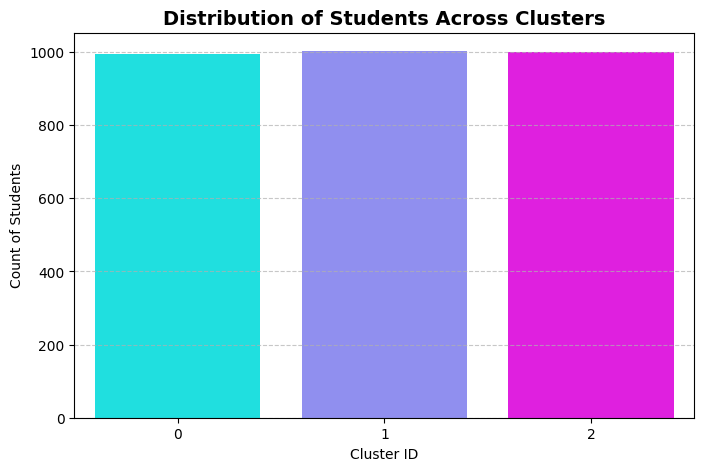

In [37]:
# Visualization: Distribution of Students Across Clusters
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ClusterID", hue="ClusterID", palette="cool", legend=False)
plt.title("Distribution of Students Across Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Cluster ID")
plt.ylabel("Count of Students")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save Final Dataset
df.to_csv("final_clustering_dataset.csv", index=False)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load Final Dataset
try:
    df = pd.read_csv("final_clustering_dataset.csv")
    df['ClusterID'] = df['ClusterID'].astype(int)
except FileNotFoundError:
    print("Dataset not found. Using sample data for demonstration.")
    df = pd.DataFrame({
        'Student_ID': ['S1', 'S2', 'S3', 'S4', 'S5'],
        'ClusterID': [0, 1, 2, 0, 2],
        'late_submissions': [7, 1, 3, 4, 2],
        'quiz_avg': [55, 88, 67, 45, 70],
        'forum_posts': [2, 9, 3, 4, 5]
    })

# Cluster-wise Recommendations
recommendations = {
    0: {
        "Cluster Name": "Struggling & Over-Engaged",
        "Actions": [
            "Break long study sessions into 45-minute focused blocks with short breaks.",
            "Review topics immediately after study sessions to improve retention.",
            "Practice explaining topics without notes to reinforce understanding."
        ],
        "Techniques": [
            "Active Recall using flashcards or tests.",
            "Feynman Technique – teach a concept simply to identify weak areas.",
            "Spaced Repetition – review key topics periodically."
        ],
        "Tools": [
            "Anki (flashcards), Google Calendar (time management).",
            "Notebook or whiteboard for active learning."
        ],
        "Motivation": "Focus on learning efficiently, not just longer. Shift from reading to doing and explaining."
    },
    1: {
        "Cluster Name": "High-Achieving & Balanced",
        "Actions": [
            "Spend 1–2 hours weekly exploring advanced or interdisciplinary topics.",
            "Engage in peer review or tutoring to deepen understanding.",
            "Apply learned concepts to real-world case studies."
        ],
        "Techniques": [
            "Peer tutoring to reinforce learning.",
            "Connect concepts across subjects for deeper understanding.",
            "Critically evaluate materials or research papers."
        ],
        "Tools": [
            "Mendeley, JSTOR, LinkedIn Learning for further development.",
            "Professional journals and reference books."
        ],
        "Motivation": "Leverage your strengths to mentor others and build advanced expertise."
    },
    2: {
        "Cluster Name": "Average Performers",
        "Actions": [
            "Add 15 minutes of focused study daily to strengthen weak areas.",
            "Engage weekly in forum discussions or group learning.",
            "Plan short, objective-driven study sessions before starting work."
        ],
        "Techniques": [
            "Micro-learning using 10-minute review slots.",
            "Break large assignments into weekly milestones.",
            "Ask and answer specific questions in study groups."
        ],
        "Tools": [
            "Trello or Microsoft To Do for task management.",
            "Color-coded planners or sticky notes for quick review."
        ],
        "Motivation": "Consistency beats intensity — small, regular efforts yield big results."
    }
}

# Recommendations per Student
def generate_recommendations(cluster_id, student_id, late_submissions=0, quiz_avg=0, forum_posts=0):
    if cluster_id not in recommendations:
        return {"Error": f"Invalid ClusterID: {cluster_id}"}

    rec = recommendations[cluster_id].copy()

    # Personalization adjustments
    if late_submissions > 3 and cluster_id != 1:
        rec["Motivation"] = f"Your {late_submissions} late submissions indicate time pressure. Try to schedule tasks earlier. " + rec["Motivation"]
    if cluster_id == 2 and forum_posts < 5:
        rec["Actions"].append("Increase forum participation — post or reply at least once weekly.")
    if cluster_id == 0 and quiz_avg < 60:
        rec["Techniques"].insert(0, "Drill Practice – spend 1 hour weekly redoing low-score quizzes.")

    return {
        "Student_ID": student_id,
        "ClusterID": cluster_id,
        **rec
    }

# Function: Display Recommendations in Table Format
def show_recommendations(rec):
    if "Error" in rec:
        print(rec["Error"])
        return

    cluster_info = f"""
    <div style='font-size:16px; font-weight:500; margin-top:10px;'>
    <h3>Cluster {rec["ClusterID"]}: {rec["Cluster Name"]}</h3>
    <table style='width:90%; border-collapse:collapse; font-size:15px; margin-bottom:15px;'>
      <tr><th style='text-align:left; padding:8px; border-bottom:1px solid #ccc;'>Category</th>
          <th style='text-align:left; padding:8px; border-bottom:1px solid #ccc;'>Recommendations</th></tr>
      <tr><td style='vertical-align:top; padding:8px; font-weight:500;'>Actions</td>
          <td style='padding:8px;'>{'<br>'.join(rec["Actions"])}</td></tr>
      <tr><td style='vertical-align:top; padding:8px; font-weight:500;'>Techniques</td>
          <td style='padding:8px;'>{'<br>'.join(rec["Techniques"])}</td></tr>
      <tr><td style='vertical-align:top; padding:8px; font-weight:500;'>Tools</td>
          <td style='padding:8px;'>{'<br>'.join(rec["Tools"])}</td></tr>
      <tr><td style='vertical-align:top; padding:8px; font-weight:500;'>Motivation</td>
          <td style='padding:8px;'>{rec["Motivation"]}</td></tr>
    </table></div>
    """
    display(HTML(cluster_info))

# Generate and Display Recommendations for Each Cluster
for cluster_id in df['ClusterID'].unique():
    sample = df[df['ClusterID'] == cluster_id].iloc[0]
    rec = generate_recommendations(
        cluster_id=int(sample['ClusterID']),
        student_id=sample.get('Student_ID', f"Cluster_{cluster_id}"),
        late_submissions=sample.get('late_submissions', 0),
        quiz_avg=sample.get('quiz_avg', 0),
        forum_posts=sample.get('forum_posts', 0)
    )
    show_recommendations(rec)



Category,Recommendations
Actions,Spend 1–2 hours weekly exploring advanced or interdisciplinary topics.Engage in peer review or tutoring to deepen understanding.Apply learned concepts to real-world case studies.
Techniques,Peer tutoring to reinforce learning.Connect concepts across subjects for deeper understanding.Critically evaluate materials or research papers.
Tools,"Mendeley, JSTOR, LinkedIn Learning for further development.Professional journals and reference books."
Motivation,Leverage your strengths to mentor others and build advanced expertise.


Category,Recommendations
Actions,Break long study sessions into 45-minute focused blocks with short breaks.Review topics immediately after study sessions to improve retention.Practice explaining topics without notes to reinforce understanding.
Techniques,Drill Practice – spend 1 hour weekly redoing low-score quizzes.Active Recall using flashcards or tests.Feynman Technique – teach a concept simply to identify weak areas.Spaced Repetition – review key topics periodically.
Tools,"Anki (flashcards), Google Calendar (time management).Notebook or whiteboard for active learning."
Motivation,"Your 5 late submissions indicate time pressure. Try to schedule tasks earlier. Focus on learning efficiently, not just longer. Shift from reading to doing and explaining."


Category,Recommendations
Actions,"Add 15 minutes of focused study daily to strengthen weak areas.Engage weekly in forum discussions or group learning.Plan short, objective-driven study sessions before starting work.Increase forum participation — post or reply at least once weekly."
Techniques,Micro-learning using 10-minute review slots.Break large assignments into weekly milestones.Ask and answer specific questions in study groups.
Tools,Trello or Microsoft To Do for task management.Color-coded planners or sticky notes for quick review.
Motivation,"Consistency beats intensity — small, regular efforts yield big results."


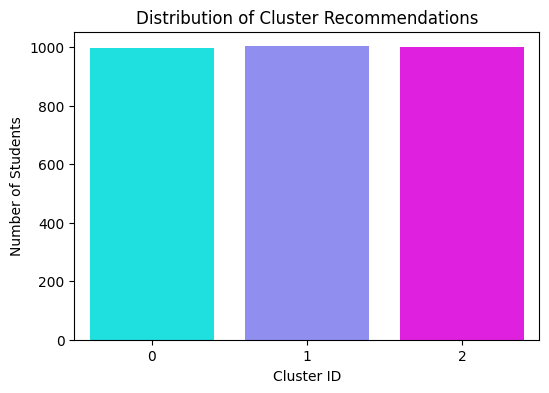

In [34]:
# Visualization: Cluster Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="ClusterID", hue="ClusterID", palette="cool", legend=False)
plt.title("Distribution of Cluster Recommendations")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Students")
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load Dataset loaded
df = pd.read_csv("final_clustering_dataset.csv")

# Added Recommendations
def get_recommendation(cluster_id):
    if cluster_id == 0:
        return "Maintain consistency; explore leadership roles or peer mentoring."
    elif cluster_id == 1:
        return "Focus on improving practical applications; increase hands-on projects."
    elif cluster_id == 2:
        return "Seek academic support; attend revision sessions and group studies."
    else:
        return "General recommendation: Maintain balanced performance across areas."

df["Recommendation"] = df["ClusterID"].apply(get_recommendation)

# Save updated dataset
df.to_csv("final_clustering_dataset.csv", index=False)

# Generated Cluster Summary
num_cols = df.select_dtypes(include="number").columns.tolist()
cluster_summary = df.groupby("ClusterID")[num_cols].mean().round(2)

# Add count per cluster
cluster_summary["Count"] = df["ClusterID"].value_counts().sort_index().values

# Ensure proper structure
if "ClusterID" not in cluster_summary.columns:
    cluster_summary.reset_index(inplace=True)

# Simple Cluster Tables
print("Cluster Summary Tables:\n")

for cluster_id in sorted(df["ClusterID"].unique()):
    print(f"\nCluster {cluster_id} Summary\n")

    cluster_data = cluster_summary[cluster_summary["ClusterID"] == cluster_id].copy()
    cluster_data = cluster_data.drop(columns=["ClusterID"])
    cluster_data = cluster_data.T.reset_index()
    cluster_data.columns = ["Feature", "Value"]

    # Display table neatly
    display(
        cluster_data.style.set_properties(**{
            "font-size": "12pt",
            "font-weight": "500",
            "text-align": "center"
        })
        .hide(axis="index")
        .set_table_styles([
            {"selector": "th", "props": [("font-size", "12pt"), ("font-weight", "600"), ("text-align", "center")]},
            {"selector": "td", "props": [("padding", "6px 20px"), ("border", "1px solid #ccc")]}
        ])
    )



Cluster Summary Tables:


Cluster 0 Summary



Feature,Value
age,28.670000
prior_gpa,2.950000
total_logins,118.740000
avg_session_duration,34.280000
time_spent_on_materials,27.380000
num_forum_posts,15.770000
num_forum_replies,10.070000
late_submissions,2.860000
quiz_attempts,5.270000
quiz_scores_avg,60.050000



Cluster 1 Summary



Feature,Value
age,27.120000
prior_gpa,2.940000
total_logins,119.910000
avg_session_duration,41.490000
time_spent_on_materials,27.940000
num_forum_posts,13.750000
num_forum_replies,10.280000
late_submissions,2.510000
quiz_attempts,4.960000
quiz_scores_avg,80.560000



Cluster 2 Summary



Feature,Value
age,29.450000
prior_gpa,3.110000
total_logins,121.020000
avg_session_duration,30.600000
time_spent_on_materials,28.770000
num_forum_posts,15.070000
num_forum_replies,9.500000
late_submissions,2.060000
quiz_attempts,4.760000
quiz_scores_avg,69.780000


In [31]:
# Final Dataset Info
print("\nFinal dataset saved as 'final_clustering_dataset.csv' with added column 'Recommendation'.")
print("Preview:\n")
display(df.head())


Final dataset saved as 'final_clustering_dataset.csv' with added column 'Recommendation'.
Preview:



,student_id,age,gender,program,prior_gpa,total_logins,avg_session_duration,time_spent_on_materials,num_forum_posts,num_forum_replies,...,assignment_scores_avg,final_exam_score,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,student_performance,ClusterID,Recommendation
0,S0001,24,Male,Diploma,2.25,129,44.43,32.47,21,10,...,67.14,56.16,0.808,0.204,0.594,0.216,0.734,Fail,1,Focus on improving practical applications; inc...
1,S0002,37,Female,BSc,2.12,106,26.31,9.99,16,8,...,91.33,52.73,0.421,0.823,0.949,0.555,0.901,Fail,0,Maintain consistency; explore leadership roles...
2,S0003,32,Male,Diploma,2.61,125,40.68,35.72,13,8,...,86.04,31.85,0.034,0.463,0.503,0.416,0.315,Pass,2,Seek academic support; attend revision session...
3,S0004,28,Other,BSc,2.32,132,12.61,49.29,15,5,...,76.74,94.96,0.723,0.553,0.082,0.951,0.888,Pass,0,Maintain consistency; explore leadership roles...
4,S0005,25,Female,Diploma,2.35,118,14.96,45.75,17,13,...,42.76,91.00,0.353,0.246,0.628,0.043,0.496,Pass,2,Seek academic support; attend revision session...


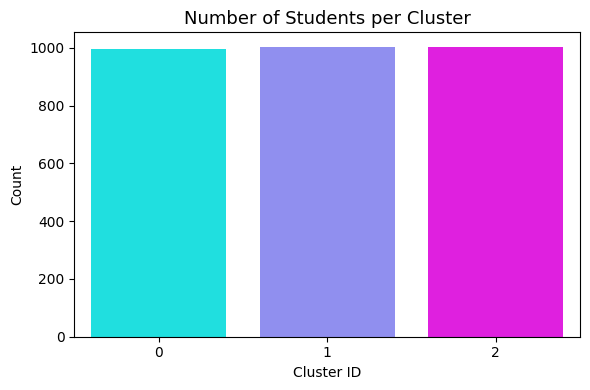

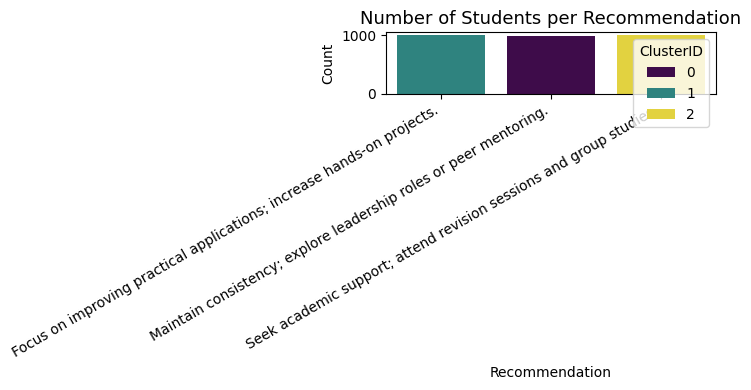

In [30]:
#Visualizations
# Count per Cluster
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="ClusterID", hue="ClusterID", palette="cool", legend=False)
plt.title("Number of Students per Cluster", fontsize=13, fontweight="medium")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Count per Recommendation
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Recommendation", hue="ClusterID", palette="viridis")
plt.title("Number of Students per Recommendation", fontsize=13, fontweight="medium")
plt.xlabel("Recommendation")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
